In [2]:
import numpy as np
import pandas as pd

# Dataset Creation:

In [3]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]],columns=['cgpa','resume_score','lpa'])

In [4]:
df

,cgpa,resume_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


# Algorithm:

## 01 : Function to "Initialize parameters"

* Layer_dims : A list containing the number of neurons in each layer, including the input and output layers/ Architecture of neural network.
* Parameters : An empty dictionary to store all weight and bias matrices.

* initializes w = 0.1 and b = 0


In [6]:
def initialize_parameters(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)  # number of layers including input layer

    for i in range(1, L):
        parameters['W' + str(i)] = np.ones((layer_dims[i], layer_dims[i - 1])) * 0.1
        parameters['b' + str(i)] = np.zeros((layer_dims[i], 1))

    return parameters


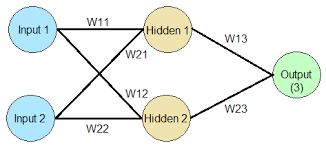

since our arch is 2 input, 2 neuron in hidden layer and an output layer, so:

In [7]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1, 0.1]]),
 'b2': array([[0.]])}

Here
* w1 = weight of input layer - 4
* w2 = weight of hidden layer - 2
* b1 = hidden layer
* b2 = output layer

## 02 : Function to "calcultate output of some specific neuron"

The function depends on 5 things(acc to aour arch):
* Two i/p - A[i]
* Two weights
* Its bias

In [18]:
def linear_forward(A_prev,w,b):
  Z = np.dot(w,A_prev) + b
  return Z

## 03 : Main function for "forward propogation"

In [41]:
def L_layer_forward(X, parameters):
    A = X  # A holds the current layer's activation (starting with input X)
    L = len(parameters) // 2  # Total number of layers (since each layer has W and b)

    for l in range(1, L + 1):
        A_prev = A  # Store previous layer's activation

        # Fetch weights and biases for the current layer
        W = parameters['W' + str(l)] #as W1, W2, ....
        b = parameters['b' + str(l)]

        # Prints to understand the flow
        # print("A" + str(l - 1) + ":", A_prev)
        # print("W" + str(l) + ":", W)
        # print("b" + str(l) + ":", b)
        # print("--" * 20)

        # Perform linear forward (Z = W*A + b), and apply activation inside that function
        A = linear_forward(A_prev, W, b)

        # Output of current layer after activation
        # print("A" + str(l) + ": ", A)
        # print("**" * 20)

    return A,A_prev  # Final activation (i.e., prediction/output)


**Doing forward propogation on row - 01**

In [26]:
X = df[['cgpa','resume_score']].values[0].reshape(2,1)
y = df[['lpa']].values[0][0]
#initialize parameters:
parameters = initialize_parameters([2,2,1])
#forward propogation:
y_hat, A1 = L_layer_forward(X, parameters)

A0: [[8]
 [8]]
W1: [[0.1 0.1]
 [0.1 0.1]]
b1: [[0.]
 [0.]]
----------------------------------------
A1:  [[1.6]
 [1.6]]
****************************************
A1: [[1.6]
 [1.6]]
W2: [[0.1 0.1]]
b2: [[0.]]
----------------------------------------
A2:  [[0.32]]
****************************************


* Here A2 is required o/p of row - 1

In [31]:
y_hat = y_hat[0][0]

In [32]:
A1

array([[1.6],
       [1.6]])

**Calculating loss:**

In [27]:
A_2 = 0.32
loss = np.square(y - A_2)
print(loss)

13.5424


**Updating trainable parameters using gradient descent**

In [37]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][0][1] = parameters['W2'][0][1] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['b2'][0][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][1]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][1]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][1])

In [38]:
update_parameters(parameters, y, y_hat, A1, X)

In [ ]:
update_parameters(parameters, y, y_hat, A1, X)

In [39]:
display(parameters)

{'W1': array([[0.11454948, 0.11454948],
        [0.10727474, 0.10727474]]),
 'b1': array([[0.00181869],
        [0.00090934]]),
 'W2': array([[0.135328, 0.123552]]),
 'b2': array([[0.01472]])}

## **Main algorithm for looping through whole data for i no of epochs:**

In [42]:
parameters = initialize_parameters([2,2,1])
epochs = 5
for i in range(epochs):
  Loss = []

  for j in range(df.shape[0]):
    X = df[['cgpa','resume_score']].values[j].reshape(2,1)
    y = df[['lpa']].values[j][0]
    #initialize parameters:
    y_hat, A1 = L_layer_forward(X, parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters, y, y_hat, A1, X)

    Loss.append(np.square(y-y_hat))
  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())
parameters

Epoch -  1 Loss -  26.249691774703265
Epoch -  2 Loss -  19.19634375189233
Epoch -  3 Loss -  9.702531836210806
Epoch -  4 Loss -  3.027416260208091
Epoch -  5 Loss -  1.0597082587765176


{'W1': array([[0.27790431, 0.40579137],
        [0.27790431, 0.40579137]]),
 'b1': array([[0.0295198],
        [0.0295198]]),
 'W2': array([[0.46411039, 0.46411039]]),
 'b2': array([[0.11664796]])}